Expression levels of $77$ proteins obtained from $38$ normal genotype control mice  and from $34$ of their trisomic littermates, both with and without treatment with the drug memantine and with and without the stimulation to learn.

The data is from Higuera C, Gardiner KJ, Cios KJ. "Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome", PLoS One (2015)

# Utils

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib import colormaps as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit
import clustergraph.plot_graph as pg
    
def get_learning_outcome(lab):
    if lab == "c-CS-s" or lab == "c-CS-m":
        return "Normal"

    elif lab == "t-CS-s":
        return "Failed"

    elif lab == "t-CS-m":
        return "Rescued"

    else:
        return "No_learning"

    
def draw_custom_graph(graph, ax,  title, patches = None, label_pos_offset=0):
    pos = nx.kamada_kawai_layout(graph, scale=1, center=(0, 0), weight="weight")
    nx.draw_networkx_edges(graph, pos=pos, ax=ax)
    edge_labels = {
        (u, v): "{:.1f}".format(data["weight"])
        for u, v, data in graph.edges(data=True)
    }
    nx.draw_networkx_edge_labels(
        graph,
        pos,
        edge_labels=edge_labels,
        font_color="black",
        font_size=11,
        ax=ax,
        label_pos=0.5 + label_pos_offset
    )

    node_colors = [data["color"] for _, data in graph.nodes(data=True)]
    node_sizes = [data.get("size_plot", 1) * 5500 for _, data in graph.nodes(data=True)]
    nx.draw_networkx_nodes(
        graph,
        pos=pos,
        node_color=node_colors,
        node_size=node_sizes,
        edgecolors="black",
        ax=ax,
    )

    nx.draw_networkx_labels(
        graph,
        pos=pos,
        labels={node: str(node) for node in graph.nodes()},
        font_size=16,
        font_color="black",
        ax=ax,
    )
    if patches != None:
        ax.legend(handles=patches)
    ax.set_title(title, fontsize=20)

def plot_inertia_vs_k(X, ax, k_min=2, k_max=6, title="Inertia vs Number of Clusters"):
    inertias = []
    k_values = range(k_min, k_max + 1)

    for k in k_values:
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        inertias.append(model.inertia_)

    ax.plot(k_values, inertias, marker='o', linestyle='-')
    ax.set_xlabel("Number of clusters (k)")
    ax.set_ylabel("Inertia")
    ax.set_title(title)
    ax.grid(True)
    return inertias


df = pd.read_csv("data/mice_protein_no_NaN.csv")
X = df.iloc[:, :-1].to_numpy()
labels = [get_learning_outcome(lab) for lab in df["class"]]
df["label"] = labels

scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class,label
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.132539,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m,Normal
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.132539,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m,Normal
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.132539,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m,Normal
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132539,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m,Normal
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.132539,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.137082,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,t-SC-s,No_learning
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.137082,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,t-SC-s,No_learning
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.137082,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,t-SC-s,No_learning
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.137082,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,t-SC-s,No_learning


In [2]:
import scanpy as sc
import anndata
from sklearn.impute import SimpleImputer
from matplotlib.lines import Line2D

X_ann = X_pca.copy()
adata = anndata.AnnData(X_ann)

# Preprocessing: Normalize, log-transform, and compute neighbors
sc.pp.normalize_total(adata, target_sum=1e4)
print("NaNs before log1p:", np.any(np.isnan(adata.X)))
adata.X += 1e-6
sc.pp.log1p(adata)
imputer = SimpleImputer(strategy="mean")
adata.X = imputer.fit_transform(adata.X)

sc.pp.pca(adata)
sc.pp.neighbors(adata)

# Clustering: Use Louvain or Leiden to define cell groups
sc.tl.louvain(adata)
adata.obs["clusters"] = adata.obs["louvain"]
adata.obs["labels"] = labels

# Compute PAGA
sc.tl.paga(adata, groups="clusters")

# Plot PAGA with a chosen color map
unique_labels = adata.obs['labels'].cat.categories.tolist()  # Convert to list
cmap = plt.cm.tab10  # Directly using 'tab10'
colors = [cmap(i) for i in range(len(unique_labels))]

label_color_map = dict(zip(unique_labels, colors))
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in colors]

C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\scanpy\preprocessing\_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))
C:\Users\mathi\anaconda3\envs\tda\lib\site-packages\scanpy\preprocessing\_simple.py:387: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


NaNs before log1p: False


In [3]:
unique_labels = adata.obs['labels'].cat.categories.tolist()
cmap = plt.cm.tab10
colors = [cmap(i) for i in range(len(unique_labels))]

label_color_map = {label: matplotlib.colors.rgb2hex(color[:3]) for label, color in zip(unique_labels, colors)}
hex_colors = [label_color_map[label] for label in labels]

keys = list(label_color_map)
patches = [mpatches.Patch(color=label_color_map[k], label=k) for k in keys]

# Computation of ClusterGraph groups based (four clusters)

In [4]:
cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(np.array(labels)), X=X_pca, metric_clusters="average"
)
cluster_g.color_graph(node_color_labels= np.array(hex_colors) )

# Division of each group into subclusters

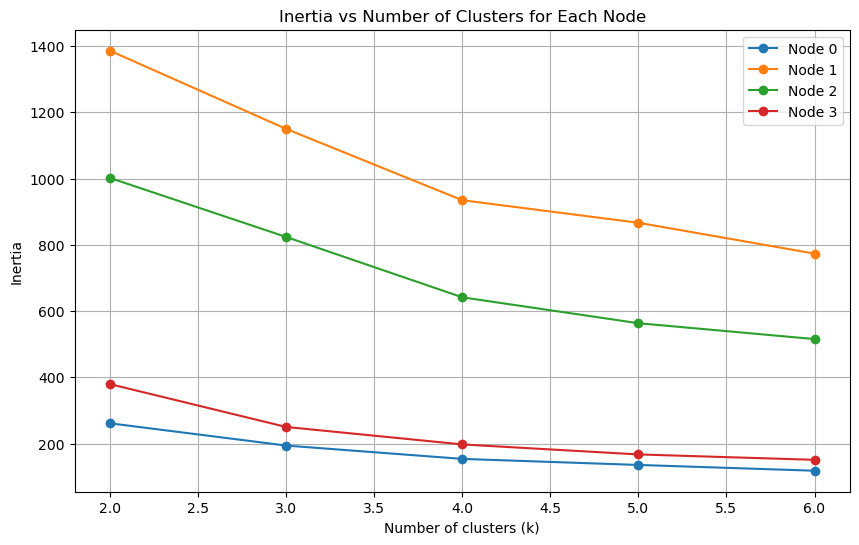

In [5]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")
fig, ax = plt.subplots(figsize=(10, 6))

for n in cluster_g.Graph.nodes:
    cluster = cluster_g.Graph.nodes[n]["points_covered"]
    restricted_datasets = df.loc[cluster]
    X_restricted = restricted_datasets.iloc[:, :-2].to_numpy()
    
    inertias = []
    k_values = range(2, 7)
    for k in k_values:
        model = KMeans(n_clusters=k, random_state=42, n_init='auto')
        model.fit(X_restricted)
        inertias.append(model.inertia_)
    
    ax.plot(k_values, inertias, marker='o', label=f"Node {n}")

ax.set_xlabel("Number of clusters (k)")
ax.set_ylabel("Inertia")
ax.set_title("Inertia vs Number of Clusters for Each Node")
ax.grid(True)
ax.legend()
plt.show()

As the inertia of the groups strongly varies, we divide each group as followed :

- 5 clusters for the orange group (No learning group)

- 4 clusters for the green group (Normal group)

- 2 clusters for the blue and red groups (respectively failed and rescued groups)

In [6]:
prev_max_label = 0
color_nodes = {}
global_pred = [-1]*len(df)
old_pred = []
label_offset = 0

for n in cluster_g.Graph.nodes:
    cluster = cluster_g.Graph.nodes[n]["points_covered"]
    restricted_datasets = df.loc[cluster]
    X_restricted = restricted_datasets.iloc[:, :-2].to_numpy()
    if n in [0,3] :
        k = 2
    elif n == 2:
        k = 4
    else :
        k = 5
    model = KMeans(k, random_state=42, n_init='auto')
    pred = model.fit_predict(X_restricted)
    pred = pred + label_offset
    label_offset = pred.max() + 1
        
    for index, prediction_point in enumerate(pred):
        global_pred[cluster[index]] = prediction_point
    
    for label_pred in np.unique(pred):
        color_nodes[label_pred] = cluster_g.Graph.nodes[n]["color"]

# Computation of the multilevel ClusterGraph

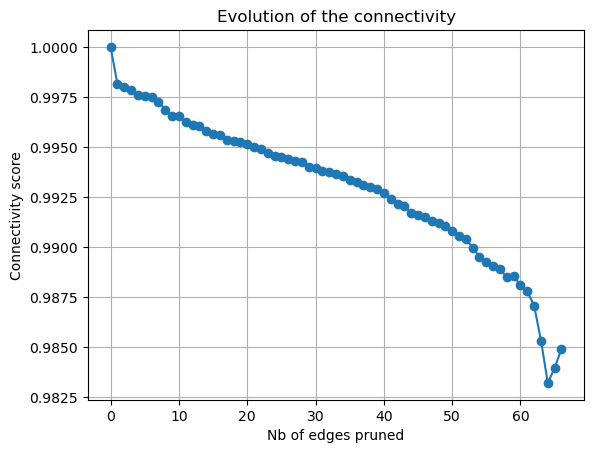

In [11]:
Cg_multilevel = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(global_pred), X=X_pca, metric_clusters="average"
)
colored_clusters = [ color_nodes[global_pred[i] ] for i in range(len(global_pred)) ]
Cg_multilevel.color_graph(node_color_labels= color_nodes)

conn_graph_multi, conn = Cg_multilevel.prune_conn(score=True)
conn_graph_multi = Cg_multilevel.prune_conn(nb_edge_pruned=56)

plt.plot(range(len(conn)), conn, marker='o')
plt.ylabel("Connectivity score")
plt.xlabel("Nb of edges pruned")
plt.title("Evolution of the connectivity")
plt.grid(True)
plt.show()

# Comparison between ClusterGraphs with the four real classes and the one with the subdivision of each group

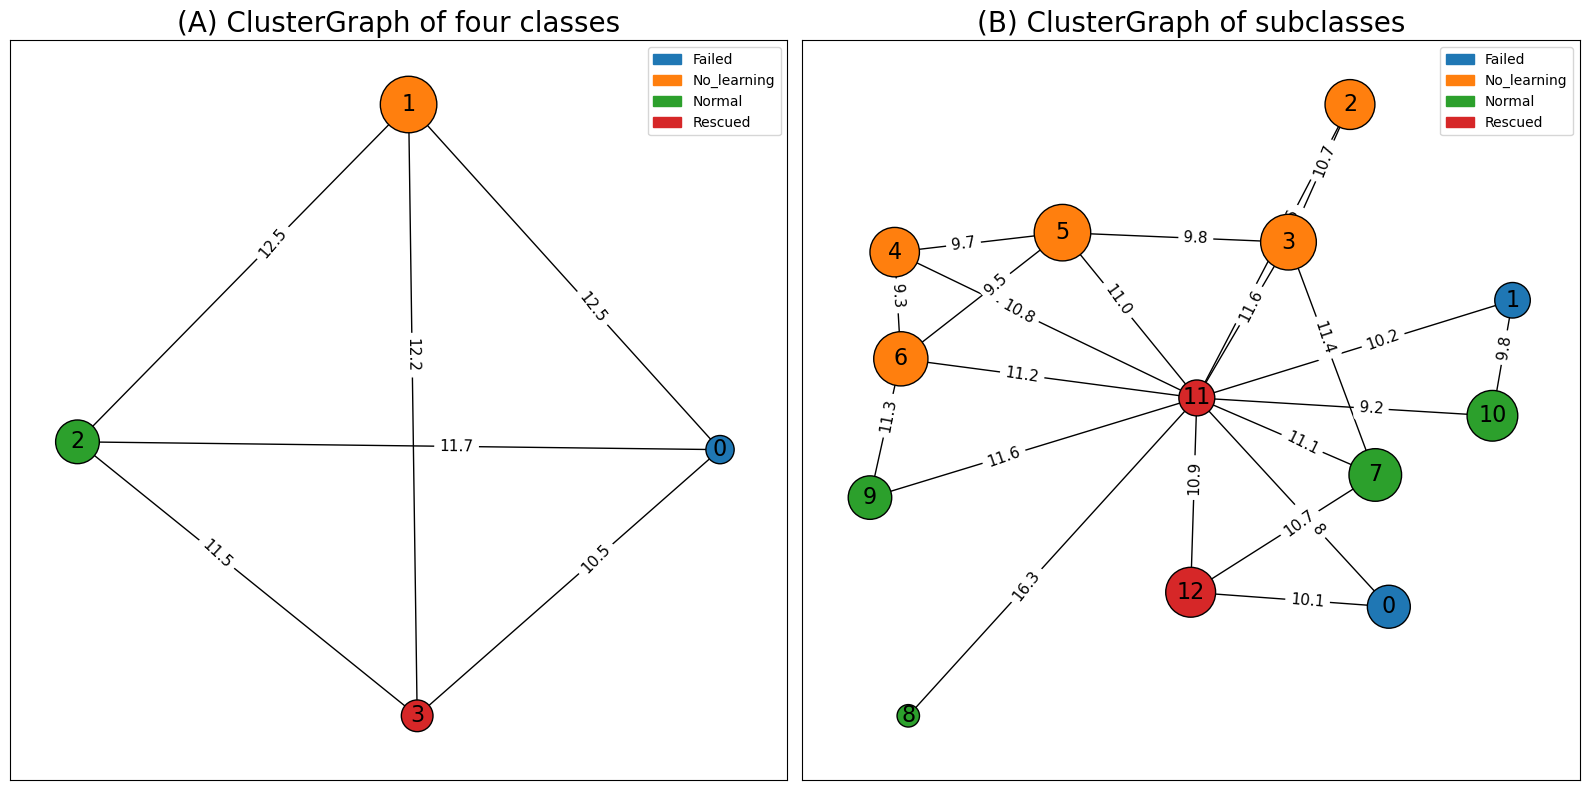

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

draw_custom_graph(cluster_g.Graph, axs[0], "(A) ClusterGraph of four classes", patches, label_pos_offset=0.09)
draw_custom_graph(conn_graph_multi, axs[1], "(B) ClusterGraph of subclasses", patches, label_pos_offset=0.09)

plt.tight_layout()
plt.show()